Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Dataset

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/train_data.xlsx")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Description

In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.shape

(614, 13)

In [ ]:
df_info=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
df.set_index('Loan_ID', inplace=True)

In [ ]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Different Columns

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

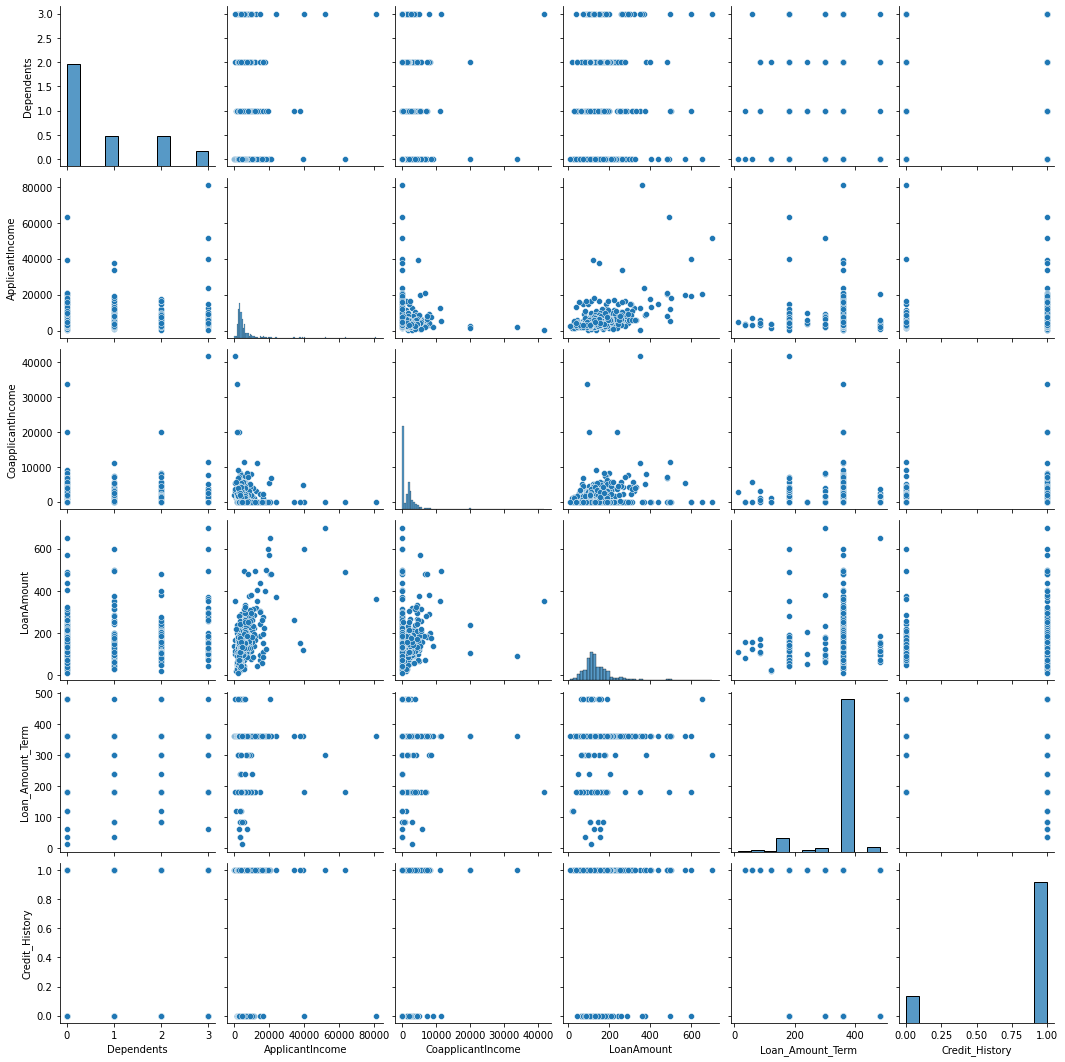

In [ ]:
sns.pairplot(df)

To count the Null Values in each Feature









In [ ]:
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Heatmap

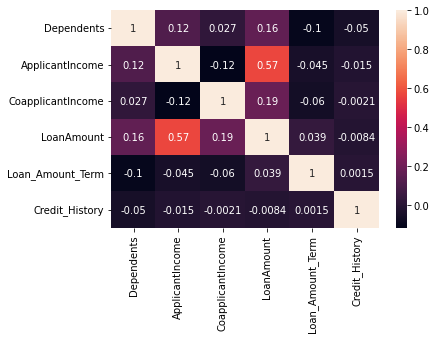

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe(include='object')

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,614,582,614,614
unique,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Semiurban,Y
freq,489,398,480,500,233,422


In [ ]:
df.groupby('Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


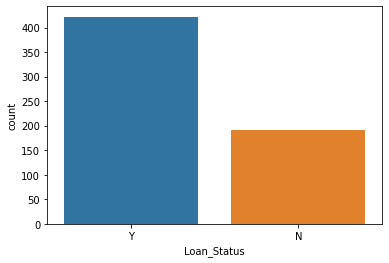

In [ ]:
sns.countplot(df['Loan_Status'])

In [ ]:
print("The Percentage of 'Yes' Class:%.2f"%(df['Loan_Status'].value_counts()[0]/len(df)))

The Percentage of 'Yes' Class:0.69


In [ ]:
print("The Percentage of 'No' Class:%.2f"%(df['Loan_Status'].value_counts()[1]/len(df)))

The Percentage of 'No' Class:0.31


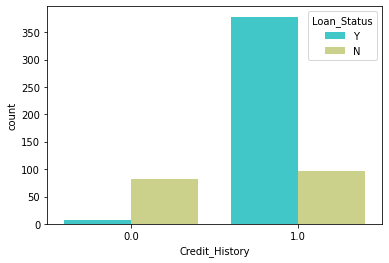

In [ ]:

sns.countplot(x='Credit_History',hue='Loan_Status',data=df,palette='rainbow')

In [ ]:
ctab1=pd.crosstab(df['Credit_History'],df['Loan_Status'])
ctab1

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
print("The proportion of 'Yes' among the people whose credit history is 1:%.2f"%(378/475))

The proportion of 'Yes' among the people whose credit history is 1:0.80


In [ ]:
print("The proportion of 'No' among the people whose credit history is 0:%.2f"%(82/89))

The proportion of 'No' among the people whose credit history is 0:0.92


In [ ]:
from scipy.stats import binom_test

In [ ]:
binom_test(378,385,0.5,alternative='two-sided')

6.088735131521579e-102

In [ ]:
! pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy.stats as stats
import researchpy as rp

In [ ]:
stats.chi2_contingency(ctab1)

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))

In [ ]:
crosstab,test_results,expected= rp.crosstab(df["Credit_History"],df["Loan_Status"],
                                           test="chi-square",
                                           expected_freqs=True,
                                           prop="cell")
crosstab

Loan_Status               
Loan_Status              N      Y     All
Credit_History                           
0.0                  14.54   1.24   15.78
1.0                  17.20  67.02   84.22
All                  31.74  68.26  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,177.9320
1,p-value =,0.0000
2,Cramer's phi =,0.5617


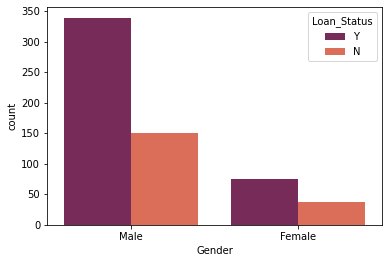

In [ ]:

sns.countplot(x='Gender',hue='Loan_Status',data=df,palette='rocket')

In [ ]:
ctab2=pd.crosstab(df['Gender'],df['Loan_Status'])
ctab2

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
print("Percentage Of Yes Among male People:%.2f"%(339/489))

Percentage Of Yes Among male People:0.69


In [ ]:
print("Percentage Of Yes Among Feamle People:%.2f"%(75/112))

Percentage Of Yes Among Feamle People:0.67


In [ ]:
from scipy.stats import binom_test

In [ ]:
binom_test(339,414,0.5,alternative='two-sided')

3.6258910686889254e-41

In [ ]:
stats.chi2_contingency(ctab2)

(0.13962612116543877,
 0.7086529816451106,
 1,
 array([[ 34.84858569,  77.15141431],
        [152.15141431, 336.84858569]]))

In [ ]:
crosstab,test_results,expected=rp.crosstab(df["Gender"],df["Loan_Status"],
                                          test="chi-square",
                                          expected_freqs=True,
                                          prop="cell")
crosstab

Loan_Status               
Loan_Status           N      Y     All
Gender                                
Female             6.16  12.48   18.64
Male              24.96  56.41   81.36
All               31.11  68.89  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.2370
1,p-value =,0.6264
2,Cramer's phi =,0.0199


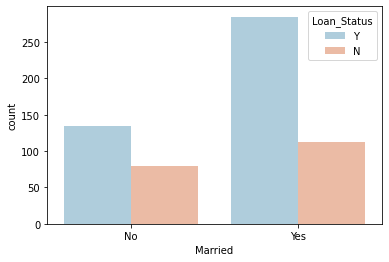

In [ ]:

sns.countplot(x='Married',hue='Loan_Status',data=df,palette='RdBu_r')

In [ ]:
ctab3=pd.crosstab(df['Married'],df['Loan_Status'])
ctab3

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [ ]:
print("the percentage of yes among Married People:%.2f"%(285/398))

the percentage of yes among Married People:0.72


In [ ]:
print("The Percentage of Yes among unmarried people:%.2f"%(134/213))

The Percentage of Yes among unmarried people:0.63


In [ ]:
from scipy.stats import binom_test

In [ ]:
binom_test(285,419,0.5,alternative='two-sided')

1.2765437757427244e-13

In [ ]:
stats.chi2_contingency(ctab3)

(4.475019348315097,
 0.03439381301579988,
 1,
 array([[ 66.93289689, 146.06710311],
        [125.06710311, 272.93289689]]))

In [ ]:
crosstab,test_resuts,expected = rp.crosstab(df["Married"],df["Loan_Status"],
                                           test="chi-square",
                                           expected_freqs=True,
                                           prop="cell")
crosstab


Loan_Status               
Loan_Status           N      Y     All
Married                               
No                12.93  21.93   34.86
Yes               18.49  46.64   65.14
All               31.42  68.58  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.2370
1,p-value =,0.6264
2,Cramer's phi =,0.0199


In [ ]:
expected

Loan_Status            
Loan_Status           N           Y
Married                            
No            66.932897  146.067103
Yes          125.067103  272.932897

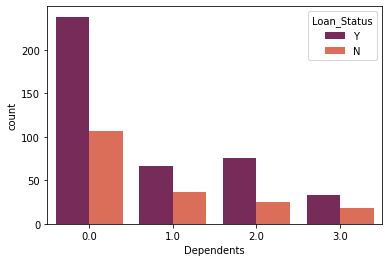

In [ ]:

sns.countplot(x='Dependents',hue='Loan_Status',data=df,palette='rocket')

In [ ]:
ctab4=pd.crosstab(df['Dependents'],df['Loan_Status'])
ctab4

Loan_Status,N,Y
Dependents,,
0.0,107,238
1.0,36,66
2.0,25,76
3.0,18,33


In [ ]:
print('Proportion of people of yes category with 0 dependents:%.2f'%(238/345))

Proportion of people of yes category with 0 dependents:0.69


In [ ]:
print('Proportion of people of yes category with 1 dependents:%.2f'%(66/102))

Proportion of people of yes category with 1 dependents:0.65


In [ ]:
print('Proportion of people of yes category with 2 dependents:%.2f'%(76/101))

Proportion of people of yes category with 2 dependents:0.75


In [ ]:
print('Proportion of people of yes category with more than 3 dependents:%.2f'%(33/51))

Proportion of people of yes category with more than 3 dependents:0.65


In [ ]:
stats.chi2_contingency(ctab4)

(3.158339770698263, 0.3678506740863211, 3, array([[107.12854758, 237.87145242],
        [ 31.67278798,  70.32721202],
        [ 31.36227045,  69.63772955],
        [ 15.83639399,  35.16360601]]))

In [ ]:
crosstab,test_results,expected=rp.crosstab(df["Dependents"],df["Loan_Status"],
                                          test="chi-square",
                                          expected_freqs=True,
                                          prop="cell")
crosstab

Loan_Status               
Loan_Status           N      Y     All
Dependents                            
0.0               17.86  39.73   57.60
1.0                6.01  11.02   17.03
2.0                4.17  12.69   16.86
3.0                3.01   5.51    8.51
All               31.05  68.95  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,3.1583
1,p-value =,0.3679
2,Cramer's V =,0.0726


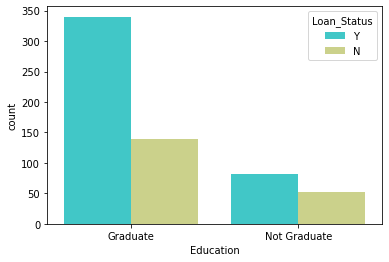

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='rainbow')

In [ ]:
ctab5=pd.crosstab(df['Education'],df['Loan_Status'])
ctab5

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
print('The proportion of people of Yes category who are graduate:%.2f'%(340/480))

The proportion of people of Yes category who are graduate:0.71


In [ ]:
print('The proportionof people of Yes category who are Not Graduate:%.2f'%(82/134))

The proportionof people of Yes category who are Not Graduate:0.61


In [ ]:
binom_test(340,422,0.5,alternative='two-sided')

2.0985726067049165e-38

In [ ]:
stats.chi2_contingency(ctab5)

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987, 329.90228013],
        [ 41.90228013,  92.09771987]]))

In [ ]:
crosstab,test_results,expected=rp.crosstab(df['Education'],df['Loan_Status'],test="chi-square",expected_freqs=True,prop="cell")
crosstab

Loan_Status               
Loan_Status            N      Y     All
Education                              
Graduate           22.80  55.37   78.18
Not Graduate        8.47  13.36   21.82
All                31.27  68.73  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,4.5289
1,p-value =,0.0333
2,Cramer's phi =,0.0859


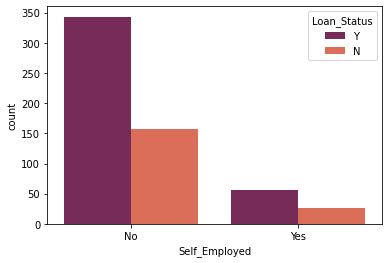

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,palette='rocket')

In [ ]:
ctab6=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
ctab6

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
print('The proportion of yes among the persons who are not self employed:%.2f'%(343/500))

The proportion of yes among the persons who are not self employed:0.69


In [ ]:
print('The proportion of Yes among the people who are self employed:%.2f'%(56/82))

The proportion of Yes among the people who are self employed:0.68


In [ ]:
from scipy.stats import binom_test

In [ ]:
binom_test(56,399,0.5,alternative='two-sided')

2.040133022581495e-51

In [ ]:
stats.chi2_contingency(ctab6)

(0.0, 1.0, 1, array([[157.21649485, 342.78350515],
        [ 25.78350515,  56.21649485]]))

In [ ]:
crosstab,test_results,expected=rp.crosstab(df['Self_Employed'],df['Loan_Status'],
                                           test="chi-square",
                                           expected_freqs=True,
                                           prop="cell"
                                           )
crosstab

Loan_Status               
Loan_Status             N      Y     All
Self_Employed                           
No                  26.98  58.93   85.91
Yes                  4.47   9.62   14.09
All                 31.44  68.56  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.0031
1,p-value =,0.9557
2,Cramer's phi =,0.0023


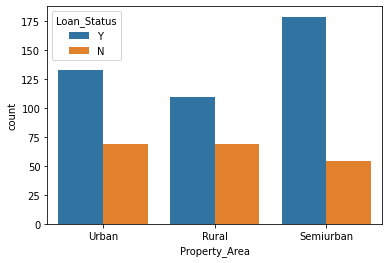

In [ ]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

In [ ]:
ctab7=pd.crosstab(df['Property_Area'],df['Loan_Status'])
ctab7

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [ ]:
print("The proportion of yes amon the people of Rural area:%.2f"%(110/179))

The proportion of yes amon the people of Rural area:0.61


In [ ]:
print("The proportion of yes among the Semiurban area :%.2f"%(179/233))

The proportion of yes among the Semiurban area :0.77


In [ ]:
print("The proportion of yes among the people of Urban Area:%.2f "%(133/202))

The proportion of yes among the people of Urban Area:0.66 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


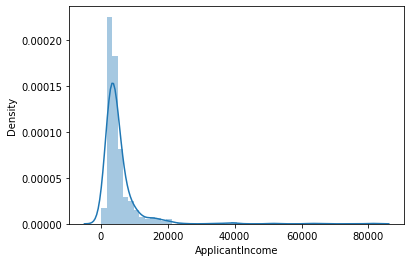

In [ ]:
sns.distplot(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


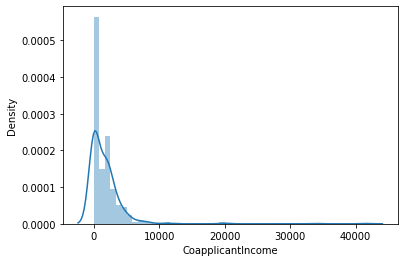

In [ ]:
sns.distplot(df['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


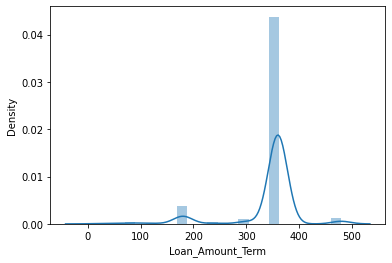

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


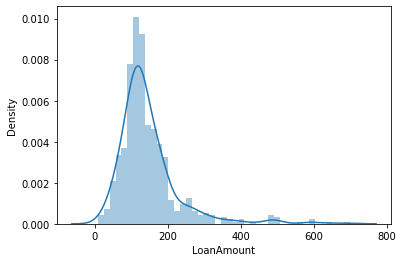

In [ ]:
sns.distplot(df['LoanAmount'])

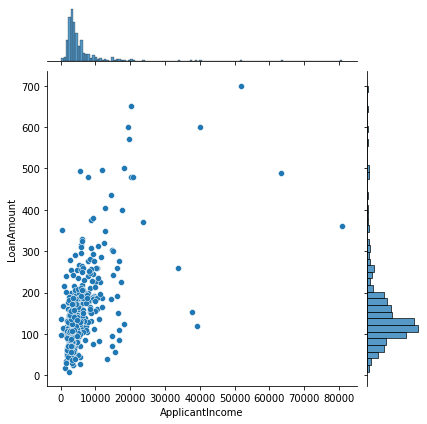

In [ ]:
 sns.jointplot (x='ApplicantIncome',y='LoanAmount',data=df)

In [ ]:
from scipy import stats

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(handle_unknown='ignore')

In [ ]:
df['Loan_Status']=encoder.fit_transform(df[['Loan_Status']]).toarray()

In [ ]:
df['Loan_Status']

Loan_ID
LP001002    0.0
LP001003    1.0
LP001005    0.0
LP001006    0.0
LP001008    0.0
           ... 
LP002978    0.0
LP002979    0.0
LP002983    0.0
LP002984    0.0
LP002990    1.0
Name: Loan_Status, Length: 614, dtype: float64

In [ ]:
df1=pd.DataFrame(df[['Loan_Status','CoapplicantIncome']])
df1

,Loan_Status,CoapplicantIncome
Loan_ID,,
LP001002,0.0,0.0
LP001003,1.0,1508.0
LP001005,0.0,0.0
LP001006,0.0,2358.0
LP001008,0.0,0.0
...,...,...
LP002978,0.0,0.0
LP002979,0.0,0.0
LP002983,0.0,240.0


In [ ]:
df1.dropna(inplace=True)
df1

,Loan_Status,CoapplicantIncome
Loan_ID,,
LP001002,0.0,0.0
LP001003,1.0,1508.0
LP001005,0.0,0.0
LP001006,0.0,2358.0
LP001008,0.0,0.0
...,...,...
LP002978,0.0,0.0
LP002979,0.0,0.0
LP002983,0.0,240.0


In [ ]:
stats.pointbiserialr(df1['Loan_Status'],df1['CoapplicantIncome'])

PointbiserialrResult(correlation=0.05918731348785011, pvalue=0.14294828684288485)

In [ ]:
df2=pd.DataFrame(df[['Loan_Status','ApplicantIncome']])
df2

,Loan_Status,ApplicantIncome
Loan_ID,,
LP001002,0.0,5849
LP001003,1.0,4583
LP001005,0.0,3000
LP001006,0.0,2583
LP001008,0.0,6000
...,...,...
LP002978,0.0,2900
LP002979,0.0,4106
LP002983,0.0,8072


In [ ]:
df2.dropna(inplace=True)
df2

,Loan_Status,ApplicantIncome
Loan_ID,,
LP001002,0.0,5849
LP001003,1.0,4583
LP001005,0.0,3000
LP001006,0.0,2583
LP001008,0.0,6000
...,...,...
LP002978,0.0,2900
LP002979,0.0,4106
LP002983,0.0,8072


In [ ]:
stats.pointbiserialr(df2['Loan_Status'],df['ApplicantIncome'])



PointbiserialrResult(correlation=0.004709522659351522, pvalue=0.9072878121306787)

In [ ]:
df3=pd.DataFrame(df[['Loan_Status','LoanAmount']])
df3

,Loan_Status,LoanAmount
Loan_ID,,
LP001002,0.0,NaN
LP001003,1.0,128.0
LP001005,0.0,66.0
LP001006,0.0,120.0
LP001008,0.0,141.0
...,...,...
LP002978,0.0,71.0
LP002979,0.0,40.0
LP002983,0.0,253.0


In [ ]:
df3.dropna(inplace=True)
df3

,Loan_Status,LoanAmount
Loan_ID,,
LP001003,1.0,128.0
LP001005,0.0,66.0
LP001006,0.0,120.0
LP001008,0.0,141.0
LP001011,0.0,267.0
...,...,...
LP002978,0.0,71.0
LP002979,0.0,40.0
LP002983,0.0,253.0


In [ ]:
stats.pointbiserialr(df3['Loan_Status'],df3['LoanAmount'])

PointbiserialrResult(correlation=0.037317768699794196, pvalue=0.3647362479104156)

In [ ]:
df4=pd.DataFrame(df[['Loan_Status','Loan_Amount_Term']])

In [ ]:
df4.dropna(inplace=True)
df4

,Loan_Status,Loan_Amount_Term
Loan_ID,,
LP001002,0.0,360.0
LP001003,1.0,360.0
LP001005,0.0,360.0
LP001006,0.0,360.0
LP001008,0.0,360.0
...,...,...
LP002978,0.0,360.0
LP002979,0.0,180.0
LP002983,0.0,360.0


In [ ]:
stats.pointbiserialr(df4['Loan_Status'],df4['Loan_Amount_Term'])

PointbiserialrResult(correlation=0.02126765812386304, pvalue=0.6031182480117666)

In [ ]:
df.groupby('Loan_Status').median()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,
0.0,0.0,3812.5,1239.5,126.0,360.0,1.0
1.0,0.0,3833.5,268.0,129.0,360.0,1.0


In [ ]:
# We will seperate the numerical columns from the categorical
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])

In [ ]:
cat_data=pd.DataFrame(cat_data)
cat_data.head()

Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
Property_Area,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Semiurban,Urban,Semiurban,...,Semiurban,Urban,Semiurban,Rural,Rural,Rural,Rural,Urban,Urban,Semiurban


In [ ]:
cat_data=pd.DataFrame(cat_data).transpose()
cat_data.head()

,Gender,Married,Education,Self_Employed,Property_Area
Loan_ID,,,,,
LP001002,Male,No,Graduate,No,Urban
LP001003,Male,Yes,Graduate,No,Rural
LP001005,Male,Yes,Graduate,Yes,Urban
LP001006,Male,Yes,Not Graduate,No,Urban
LP001008,Male,No,Graduate,No,Urban


In [ ]:
num_data=pd.DataFrame(num_data)
num_data

Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Dependents,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0
ApplicantIncome,5849.0,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,...,12000.0,2400.0,3400.0,3987.0,3232.0,2900.0,4106.0,8072.0,7583.0,4583.0
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,NaN,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Loan_Status,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
num_data=pd.DataFrame(num_data).transpose()
num_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Loan_ID,,,,,,,
LP001002,0.0,5849.0,0.0,NaN,360.0,1.0,0.0
LP001003,1.0,4583.0,1508.0,128.0,360.0,1.0,1.0
LP001005,0.0,3000.0,0.0,66.0,360.0,1.0,0.0
LP001006,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0
LP001008,0.0,6000.0,0.0,141.0,360.0,1.0,0.0


In [ ]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [ ]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode().index[0])

In [ ]:
df['Credit_History'].isnull().sum()

0

In [ ]:
df['Gender'].mode()

0    Male
dtype: object

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode().index[0])

In [ ]:
df['Gender'].isnull().sum()

0

In [ ]:
df['Married'].mode()

0    Yes
dtype: object

In [ ]:
df['Married']=df['Married'].fillna(df['Married'].mode().index[0])

In [ ]:
df['Married'].isnull().sum()

0

In [ ]:
df['Education'].mode()

0    Graduate
dtype: object

In [ ]:
df['Education']=df['Education'].fillna(df['Education'].mode().index[0])

In [ ]:
df['Education'].isnull().sum()

0

In [ ]:
df['Self_Employed'].mode()

0    No
dtype: object

In [ ]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode().index[0])

In [ ]:
df['Self_Employed'].isnull().sum()

0

In [ ]:
df['Property_Area'].mode()

0    Semiurban
dtype: object

In [ ]:
df['Property_Area']=df['Property_Area'].fillna(df['Property_Area'].mode().index[0])

In [ ]:
df['Property_Area'].isnull().sum()

0

In [ ]:
df['Dependents'].mode()


0    0.0
dtype: float64

In [ ]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode().index[0])

In [ ]:
df['Dependents'].isnull().sum()

0

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().index[0])

In [ ]:
df['Loan_Amount_Term'].isnull().sum()

0

In [ ]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode().index[0])

In [ ]:
df['Loan_Amount_Term'].isnull().sum()

0

In [ ]:
one_hot_encoded_data=pd.get_dummies(df,columns=['Gender','Married','Self_Employed','Property_Area'])
one_hot_encoded_data
                     

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_0,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,
LP001002,0.0,Graduate,5849,0.0,0.0,360.0,1.0,0.0,0,0,1,0,1,0,0,1,0,0,0,1
LP001003,1.0,Graduate,4583,1508.0,128.0,360.0,1.0,1.0,0,0,1,0,0,1,0,1,0,1,0,0
LP001005,0.0,Graduate,3000,0.0,66.0,360.0,1.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
LP001006,0.0,Not Graduate,2583,2358.0,120.0,360.0,1.0,0.0,0,0,1,0,0,1,0,1,0,0,0,1
LP001008,0.0,Graduate,6000,0.0,141.0,360.0,1.0,0.0,0,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,Graduate,2900,0.0,71.0,360.0,1.0,0.0,0,1,0,0,1,0,0,1,0,1,0,0
LP002979,3.0,Graduate,4106,0.0,40.0,180.0,1.0,0.0,0,0,1,0,0,1,0,1,0,1,0,0
LP002983,1.0,Graduate,8072,240.0,253.0,360.0,1.0,0.0,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
one_hot_encoded_data['Education']=le.fit_transform(one_hot_encoded_data['Education'])

In [ ]:
df_enc=one_hot_encoded_data
df_enc

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_0,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,
LP001002,0.0,0,5849,0.0,0.0,360.0,1.0,0.0,0,0,1,0,1,0,0,1,0,0,0,1
LP001003,1.0,0,4583,1508.0,128.0,360.0,1.0,1.0,0,0,1,0,0,1,0,1,0,1,0,0
LP001005,0.0,0,3000,0.0,66.0,360.0,1.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
LP001006,0.0,1,2583,2358.0,120.0,360.0,1.0,0.0,0,0,1,0,0,1,0,1,0,0,0,1
LP001008,0.0,0,6000,0.0,141.0,360.0,1.0,0.0,0,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0,2900,0.0,71.0,360.0,1.0,0.0,0,1,0,0,1,0,0,1,0,1,0,0
LP002979,3.0,0,4106,0.0,40.0,180.0,1.0,0.0,0,0,1,0,0,1,0,1,0,1,0,0
LP002983,1.0,0,8072,240.0,253.0,360.0,1.0,0.0,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   Education                614 non-null    int64  
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Loan_Status              614 non-null    float64
 8   Gender_0                 614 non-null    uint8  
 9   Gender_Female            614 non-null    uint8  
 10  Gender_Male              614 non-null    uint8  
 11  Married_0                614 non-null    uint8  
 12  Married_No               614 non-null    uint8  
 13  Married_Yes              614 non-null    uint8  
 14  Self_Employed_0    

In [ ]:
df_enc.drop(['Gender_Male','Married_No','Self_Employed_No','Property_Area_Urban'],axis=1,inplace=True)
df_enc

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_0,Gender_Female,Married_0,Married_Yes,Self_Employed_0,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban
Loan_ID,,,,,,,,,,,,,,,,
LP001002,0.0,0,5849,0.0,0.0,360.0,1.0,0.0,0,0,0,0,0,0,0,0
LP001003,1.0,0,4583,1508.0,128.0,360.0,1.0,1.0,0,0,0,1,0,0,1,0
LP001005,0.0,0,3000,0.0,66.0,360.0,1.0,0.0,0,0,0,1,0,1,0,0
LP001006,0.0,1,2583,2358.0,120.0,360.0,1.0,0.0,0,0,0,1,0,0,0,0
LP001008,0.0,0,6000,0.0,141.0,360.0,1.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0,2900,0.0,71.0,360.0,1.0,0.0,0,1,0,0,0,0,1,0
LP002979,3.0,0,4106,0.0,40.0,180.0,1.0,0.0,0,0,0,1,0,0,1,0
LP002983,1.0,0,8072,240.0,253.0,360.0,1.0,0.0,0,0,0,1,0,0,0,0


In [ ]:
x=df_enc.drop(['Loan_Status'],axis=1)

In [ ]:
x

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_0,Gender_Female,Married_0,Married_Yes,Self_Employed_0,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban
Loan_ID,,,,,,,,,,,,,,,
LP001002,0.0,0,5849,0.0,0.0,360.0,1.0,0,0,0,0,0,0,0,0
LP001003,1.0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1,0,0,1,0
LP001005,0.0,0,3000,0.0,66.0,360.0,1.0,0,0,0,1,0,1,0,0
LP001006,0.0,1,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,0,0,0
LP001008,0.0,0,6000,0.0,141.0,360.0,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0,2900,0.0,71.0,360.0,1.0,0,1,0,0,0,0,1,0
LP002979,3.0,0,4106,0.0,40.0,180.0,1.0,0,0,0,1,0,0,1,0
LP002983,1.0,0,8072,240.0,253.0,360.0,1.0,0,0,0,1,0,0,0,0


In [ ]:
y=df_enc['Loan_Status']
y

Loan_ID
LP001002    0.0
LP001003    1.0
LP001005    0.0
LP001006    0.0
LP001008    0.0
           ... 
LP002978    0.0
LP002979    0.0
LP002983    0.0
LP002984    0.0
LP002990    1.0
Name: Loan_Status, Length: 614, dtype: float64

Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x ,y ,test_size=.33,random_state=42,stratify=y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
pipe_1= Pipeline([('Scalar1',StandardScaler()),
                       ('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
pipe_2=Pipeline([('Scalar2',StandardScaler()),
                       ('dt_classifier',DecisionTreeClassifier())])

In [ ]:
pipe_3=Pipeline([('Scalar3',StandardScaler()),
                       ('rf_classifier',RandomForestClassifier())])

In [ ]:
pipe_4=Pipeline([('Scalar4',StandardScaler()),
                 ('sv_classifier',SVC(kernel="linear",random_state=0))])

In [ ]:
pipe_1.fit(x_train,y_train)

Pipeline(steps=[('Scalar1', StandardScaler()),
                ('lr_classifier', LogisticRegression(random_state=0))])

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score,confusion_matrix

In [ ]:
y_pred_1=pipe_1.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_1))

0.7586206896551724


In [ ]:
confusion_matrix(y_test,y_pred_1)

array([[122,  18],
       [ 31,  32]])

In [ ]:
print("Precision:{:.2f}".format(precision_score(y_test,y_pred_1)))

Precision:0.64


In [ ]:
print("Recall:{:.2f}".format(recall_score(y_test,y_pred_1)))

Recall:0.51


In [ ]:
print("F1 Score:{:.2f}".format(f1_score(y_test,y_pred_1)))

F1 Score:0.57


In [ ]:
pipe_2.fit(x_train,y_train)

Pipeline(steps=[('Scalar2', StandardScaler()),
                ('dt_classifier', DecisionTreeClassifier())])

In [ ]:
y_pred_2=pipe_2.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_2))

0.6403940886699507


In [ ]:
print(confusion_matrix(y_test,y_pred_2))

[[106  34]
 [ 39  24]]


In [ ]:
print("Precision:{:.2f}".format(precision_score(y_test,y_pred_2)))

Precision:0.41


In [ ]:
print("Recall:{:.2f}".format(recall_score(y_test,y_pred_2)))

Recall:0.38


In [ ]:
print("F1 score:{:.2f}".format(f1_score(y_test,y_pred_2)))

F1 score:0.40


In [ ]:
pipe_3.fit(x_train,y_train)

Pipeline(steps=[('Scalar3', StandardScaler()),
                ('rf_classifier', RandomForestClassifier())])

In [ ]:
y_pred_3=pipe_3.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_3))

0.7044334975369458


In [ ]:
print(confusion_matrix(y_test,y_pred_3))

[[118  22]
 [ 38  25]]


In [ ]:
print("Precision:{:.2f}".format(precision_score(y_test,y_pred_3)))

Precision:0.53


In [ ]:
print("Recall:{:.2f}".format(recall_score(y_test,y_pred_3)))

Recall:0.40


In [ ]:
print("F1 score:{:.2f}".format(f1_score(y_test,y_pred_3)))

F1 score:0.45


In [ ]:
pipe_4.fit(x_train,y_train)

Pipeline(steps=[('Scalar4', StandardScaler()),
                ('sv_classifier', SVC(kernel='linear', random_state=0))])

In [ ]:
y_pred_4=pipe_4.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred_4))

0.7684729064039408


In [ ]:
print(confusion_matrix(y_test,y_pred_4))


[[122  18]
 [ 29  34]]


In [ ]:
print("Precision:{:.2f}".format(precision_score(y_test,y_pred_4)))

Precision:0.65


In [ ]:
print("Recall:{:.2f}".format(recall_score(y_test,y_pred_4)))

Recall:0.54


In [ ]:
print("F1_Score:{:.2f}".format(f1_score(y_test,y_pred_4)))

F1_Score:0.59


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [ ]:
scores=cross_val_score(pipe_4,x_train,y_train,cv=5)

In [ ]:
scores

array([0.71084337, 0.74390244, 0.82926829, 0.79268293, 0.7804878 ])